In [79]:
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import json
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt 
import seaborn as sns
import io
import warnings

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
# font_list


plt.rcParams['font.family'] = 'NanumGothic' 


# 자료 합치기 2019년도자료로

# 손동기
- 2017 ~ 2020년 연령별 인구현황.csv

In [80]:
df_age_2019 = pd.read_csv('./data/2019년_연령별_인구현황.csv')
df_age_2019.head()


,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
0,2019,강남구,99155,161589,341839,104175,260806,284363,545169,18.19,29.64,62.70,19.11,91.72
1,2019,강동구,70623,126748,267704,97740,215335,220732,436067,16.20,29.07,61.39,22.41,97.55
2,2019,강북구,41080,84385,186920,85954,153235,160719,313954,13.08,26.88,59.54,27.38,95.34
3,2019,강서구,91410,190496,372839,127547,286563,305233,591796,15.45,32.19,63.00,21.55,93.88
4,2019,관악구,55797,196245,336650,107647,251009,249085,500094,11.16,39.24,67.32,21.53,100.77


# 김문혁
- 2017~ 2020년 서울시 고령자 통계현황.csv

In [81]:
df_elders_2019 = pd.read_csv("./data/서울시_고령자현황(구별)통계(2019).csv")
df_elders_2019.sort_values(by="자치구", ascending=True, inplace=True)
df_elders_2019.head()

,기간,자치구,노인 비율%(계),노인 비율%(남),노인 비율%(여)
0,2019,강남구,12.91,5.80,7.10
1,2019,강동구,14.41,6.58,7.83
2,2019,강북구,19.07,8.19,10.87
3,2019,강서구,14.05,6.21,7.84
4,2019,관악구,14.53,6.49,8.04


# 김희진
- 아파트 실거래 가격
- 서울 동별 인구 밀도 
- 서울시 구별 비만도
- 서울시 평균 연봉


In [82]:
df_apart_price_2019 = pd.read_csv("./data/2019년도_서울시_아파트_평균금액.csv")

df_pop_density_2019 = pd.read_csv("./data/2019년서울시인구밀도.csv")
df_bmi_2019 = pd.read_csv("./data/2019년_서울시_비만도.csv")
df_salary_2019 = pd.read_csv("./data/2019서울시구별평균연봉.csv")




In [83]:
df_apart_price_2019.head(1)

,구,년도,거래금액(만원)/전용면적(㎡),거래금액(만원)/1평,거래금액(만원)/국민평수(32평)
0,강남구,2019,2052.02343,6783.548274,217073.544761


In [84]:
df_pop_density_2019.head(1)

,기간,자치구,인구밀도
0,2019,강남구,13929


In [85]:
df_bmi_2019.head(1)

,자치구,비만(BMI≥25)
0,강남구,28.6


In [86]:
df_salary_2019.head(1)

,행정구역(시군구)별(2),평균연봉(원)
0,강남구,711977.839573


# 장건희
- 서울시_5대_범죄_발생건수(2019)_10만명당_추가_최종.csv
- 서울시_의료기관_구_별_합계(2019)_10만명당_추가_최종.csv

In [87]:
df_crime_2019 = pd.read_csv("./data/서울시_5대_범죄_발생건수(2019)_10만명당_추가_최종.csv", thousands=',')
df_hospital_2019 = pd.read_csv("./data/서울시_의료기관_구_별_합계(2019)_10만명당_추가_최종.csv", thousands=',')

In [88]:


df_crime_2019.head(1)


,기간,자치구,범죄_발생_합계,10만명 당 범죄 발생 건수
0,2019,강남구,7304,1416.074648


In [89]:
df_hospital_2019.head(1)

,기간,자치구,의료기관_총_합계,종합병원,10만명 당 의료기관 수,10만명 당 종합병원 수
0,2019,강남구,2643,4,484.803795,0.733717


# 문세웅
- 구별 데이터가 아니므로 따로 정리

# 하나의 데이터 프레임으로 전부 합치기

In [90]:
df_all_data_2019 = pd.DataFrame({
                    "행정구역":df_age_2019["행정구역"],
                    "거래금액(만원)/전용면적(㎡)":df_apart_price_2019["거래금액(만원)/전용면적(㎡)"],
                    "미성년자_비율":df_age_2019["미성년자_비율"],
                    "성인_비율":df_age_2019["성인_비율"],
                    "노인_비율":df_elders_2019["노인 비율%(계)"],
                    "남녀_성비":df_age_2019["남녀_성비"],
                    "인구_밀도":df_pop_density_2019["인구밀도"],
                    "BMI":df_bmi_2019["비만(BMI≥25)"],
                    "평균연봉":df_salary_2019["평균연봉(원)"],
                    "10만명 당 범죄 발생 건":df_crime_2019["10만명 당 범죄 발생 건수"],
                    "10만명 당 의료기관 수":df_hospital_2019["10만명 당 의료기관 수"],
                    "10만명 당 종합병원 수":df_hospital_2019["10만명 당 종합병원 수"]
})
df_all_data_2019.head()

,행정구역,거래금액(만원)/전용면적(㎡),미성년자_비율,성인_비율,노인_비율,남녀_성비,인구_밀도,BMI,평균연봉,10만명 당 범죄 발생 건,10만명 당 의료기관 수,10만명 당 종합병원 수
0,강남구,2052.023430,18.19,62.70,12.91,91.72,13929,28.6,711977.839573,1416.074648,484.803795,0.733717
1,강동구,1007.348562,16.20,61.39,14.41,97.55,17909,31.3,405105.557762,977.143421,180.935498,0.687968
2,강북구,665.266528,13.08,59.54,19.07,95.34,13462,30.3,292829.992859,1080.731572,146.836798,0.318518
3,강서구,852.656551,15.45,63.00,14.05,93.88,14438,30.7,373891.566020,867.697653,141.264895,0.675909
4,관악구,757.872395,11.16,67.32,14.53,100.77,17496,35.1,315681.639484,1104.792299,138.573948,0.199962


In [91]:
# 비교를 위한 행정구역 컬럼 제거

df_all_data_2019 = df_all_data_2019.drop("행정구역", axis = 1)
df_all_data_2019.head()


,거래금액(만원)/전용면적(㎡),미성년자_비율,성인_비율,노인_비율,남녀_성비,인구_밀도,BMI,평균연봉,10만명 당 범죄 발생 건,10만명 당 의료기관 수,10만명 당 종합병원 수
0,2052.023430,18.19,62.70,12.91,91.72,13929,28.6,711977.839573,1416.074648,484.803795,0.733717
1,1007.348562,16.20,61.39,14.41,97.55,17909,31.3,405105.557762,977.143421,180.935498,0.687968
2,665.266528,13.08,59.54,19.07,95.34,13462,30.3,292829.992859,1080.731572,146.836798,0.318518
3,852.656551,15.45,63.00,14.05,93.88,14438,30.7,373891.566020,867.697653,141.264895,0.675909
4,757.872395,11.16,67.32,14.53,100.77,17496,35.1,315681.639484,1104.792299,138.573948,0.199962


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

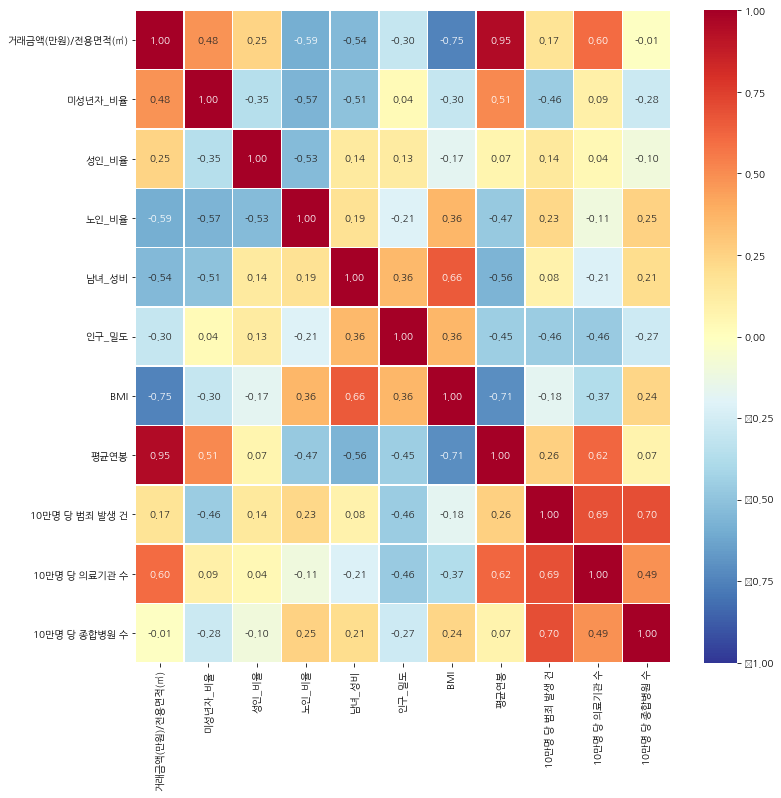

In [92]:

plt.figure(figsize=(12,12))
# sns.heatmap(data = df.corr(method='pearson'), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')

sns.heatmap(data = df_all_data_2019.corr(method='pearson'), annot=True,fmt = '.2f', linewidths=.5, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)


    r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계